<a href="https://colab.research.google.com/github/noo-nine/Churn-No-More/blob/main/At_Risk_Customers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [ ]:
churn = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Feature engineering

In [ ]:
churn.drop(columns = ['customerID'], inplace = True)

In [ ]:
churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
# all of the above features seem to have impact on the churn of the customer
# let us consider all the features to build a classification tree

In [ ]:
columns = churn.columns
for col in columns:
  print(f'{col} : {churn[col].unique()}\n')

gender : ['Female' 'Male']

SeniorCitizen : [0 1]

Partner : ['Yes' 'No']

Dependents : ['No' 'Yes']

tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

PhoneService : ['No' 'Yes']

MultipleLines : ['No phone service' 'No' 'Yes']

InternetService : ['DSL' 'Fiber optic' 'No']

OnlineSecurity : ['No' 'Yes' 'No internet service']

OnlineBackup : ['Yes' 'No' 'No internet service']

DeviceProtection : ['No' 'Yes' 'No internet service']

TechSupport : ['No' 'Yes' 'No internet service']

StreamingTV : ['No' 'Yes' 'No internet service']

StreamingMovies : ['No' 'Yes' 'No internet service']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

MonthlyCharges : [29.85 56.95 53.

In [ ]:
churn.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
churn.shape

(7043, 20)

In [ ]:
churn.duplicated().sum()

22

In [ ]:
churn.drop_duplicates(inplace = True)
churn.shape

(7021, 20)

In [ ]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors = 'coerce')

In [ ]:
churn['TotalCharges'].isna().sum()

11

In [ ]:
churn.dropna(inplace = True)

In [ ]:
churn.shape

(7010, 20)

In [ ]:
churn['MonthlyCharges'].isna().sum()

0

In [ ]:
churn['TotalCharges'].isna().sum()

0

In [ ]:
# there are no missing values

In [ ]:
churn['Churn'].value_counts()

,count
Churn,
No,5153
Yes,1857


In [ ]:
# classes are imbalanced
# lets downsample the data

Downsampling

In [ ]:
churn_no = churn[churn['Churn'] == 'No']
churn_yes = churn[churn['Churn'] == 'Yes']

In [ ]:
churn_no_downsampled = churn_no.sample(n = 1000)
len(churn_no_downsampled)

1000

In [ ]:
churn_yes_downsampled = churn_yes.sample(n = 1000)
len(churn_yes_downsampled)

1000

In [ ]:
# creating data with both the samples combined

In [ ]:
churn_downsampled = pd.concat([churn_no_downsampled, churn_yes_downsampled])
len(churn_downsampled)

2000

In [ ]:
# the classes are now balanced

Splitting the data into Dependednt and Independent Features

In [ ]:
x = churn_downsampled.drop(columns = ['Churn']).copy()
x.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
y = churn_downsampled['Churn'].copy()

Dealing with Categorical Data

In [ ]:
x.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
cols = ['gender', 'Partner', 'Dependents','PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [ ]:
for col in cols:
  print(f'{col} : {x[col].unique()}\n')

gender : ['Male' 'Female']

Partner : ['No' 'Yes']

Dependents : ['No' 'Yes']

PhoneService : ['Yes' 'No']

MultipleLines : ['No' 'Yes' 'No phone service']

InternetService : ['No' 'DSL' 'Fiber optic']

OnlineSecurity : ['No internet service' 'Yes' 'No']

OnlineBackup : ['No internet service' 'Yes' 'No']

DeviceProtection : ['No internet service' 'No' 'Yes']

TechSupport : ['No internet service' 'No' 'Yes']

StreamingTV : ['No internet service' 'No' 'Yes']

StreamingMovies : ['No internet service' 'No' 'Yes']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Bank transfer (automatic)' 'Credit card (automatic)'
 'Mailed check']



In [ ]:
x['MultipleLines'] = x['MultipleLines'].replace('No phone service', 'No')

In [ ]:
x['InternetService'] = x['InternetService'].replace(['Fiber optic', 'DSL'], 'Yes')

In [ ]:
cols_to_modify = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [ ]:
for col in cols_to_modify:
  x[col] = x[col].replace('No internet service', 'No')

In [ ]:
for col in cols:
  print(f'{col} : {x[col].unique()}\n')

gender : ['Male' 'Female']

Partner : ['No' 'Yes']

Dependents : ['No' 'Yes']

PhoneService : ['Yes' 'No']

MultipleLines : ['No' 'Yes']

InternetService : ['No' 'Yes']

OnlineSecurity : ['No' 'Yes']

OnlineBackup : ['No' 'Yes']

DeviceProtection : ['No' 'Yes']

TechSupport : ['No' 'Yes']

StreamingTV : ['No' 'Yes']

StreamingMovies : ['No' 'Yes']

Contract : ['Month-to-month' 'One year' 'Two year']

PaperlessBilling : ['Yes' 'No']

PaymentMethod : ['Electronic check' 'Bank transfer (automatic)' 'Credit card (automatic)'
 'Mailed check']



In [ ]:
x.dtypes

,0
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object
OnlineBackup,object


In [ ]:
cols_to_encode = ['gender', 'Partner', 'Dependents', 'PhoneService',
        'MultipleLines', 'InternetService', 'OnlineSecurity',
        'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
        'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [ ]:
x = pd.get_dummies(x, columns = cols_to_encode, dtype = int)

Building a Test Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [ ]:
clf_dt = DecisionTreeClassifier(random_state = 42)
clf_dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

[Text(0.43502385437252966, 0.98, 'x[28] <= 0.5\ngini = 0.5\nsamples = 1400\nvalue = [686, 714]'),
 Text(0.20855978260869565, 0.94, 'x[2] <= 93.075\ngini = 0.274\nsamples = 476\nvalue = [398, 78]'),
 Text(0.32179181849061267, 0.96, 'True  '),
 Text(0.11944169960474309, 0.9, 'x[30] <= 0.5\ngini = 0.169\nsamples = 344\nvalue = [312, 32]'),
 Text(0.07188735177865613, 0.86, 'x[2] <= 54.9\ngini = 0.262\nsamples = 161\nvalue = [136.0, 25.0]'),
 Text(0.029644268774703556, 0.82, 'x[1] <= 10.0\ngini = 0.14\nsamples = 79\nvalue = [73, 6]'),
 Text(0.019762845849802372, 0.78, 'x[33] <= 0.5\ngini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(0.015810276679841896, 0.74, 'x[32] <= 0.5\ngini = 0.397\nsamples = 11\nvalue = [8, 3]'),
 Text(0.011857707509881422, 0.7, 'x[34] <= 0.5\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text(0.007905138339920948, 0.66, 'x[9] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [8, 1]'),
 Text(0.003952569169960474, 0.62, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.01

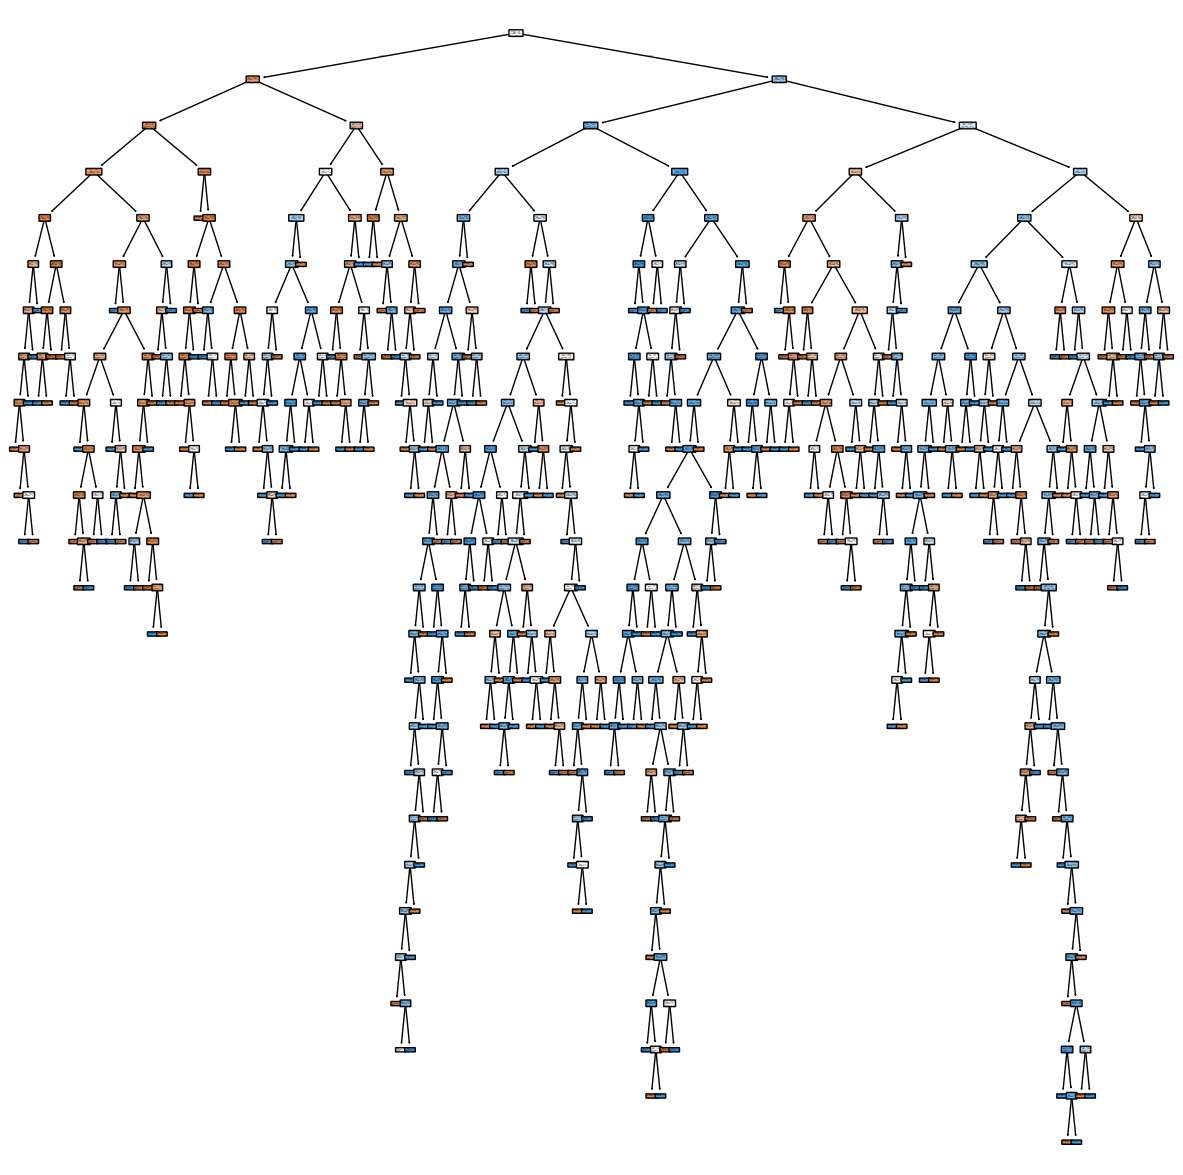

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize = (15, 15))
plot_tree(clf_dt, filled = True, rounded = True)

In [ ]:
# lets see how the model is performing

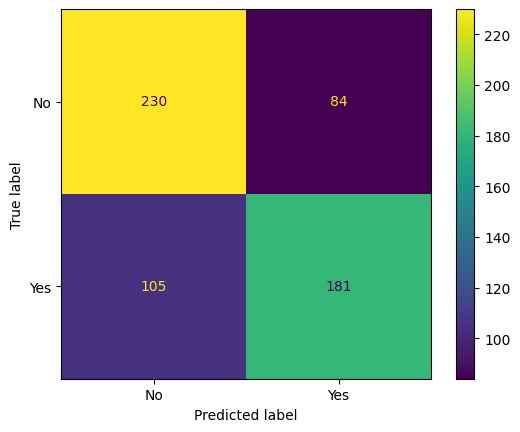

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(clf_dt, x_test, y_test)

Cost Complexity Pruning

In [ ]:
path = clf_dt.cost_complexity_pruning_path(x_train, y_train)
alphas = path.ccp_alphas
alphas = alphas[ : -1]

In [ ]:
clf_dts = []
for alpha in alphas:
  clf_dt = DecisionTreeClassifier(random_state = 35, ccp_alpha = alpha)
  clf_dt.fit(x_train, y_train)
  clf_dts.append(clf_dt)

In [ ]:
# plotting an alpha vs accuracy plot

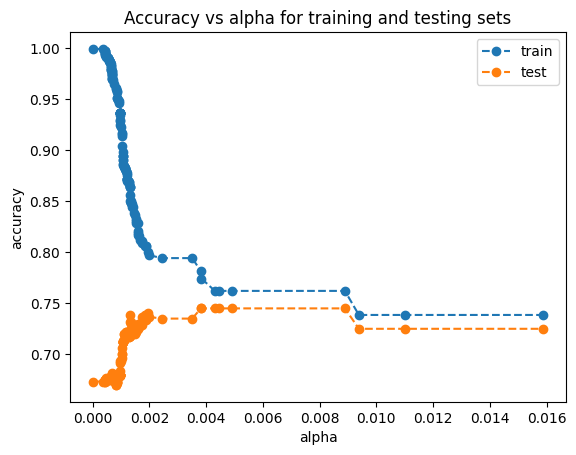

In [ ]:
train_scores = [clf_dt.score(x_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(x_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(alphas, train_scores, marker = 'o', linestyle = '--', label = 'train')
ax.plot(alphas, test_scores, marker = 'o', linestyle = '--', label = 'test')
ax.legend()
plt.show()

In [ ]:
# best value of alpha can be at alpha = 0.010

Cross Validation

<Axes: xlabel='tree'>

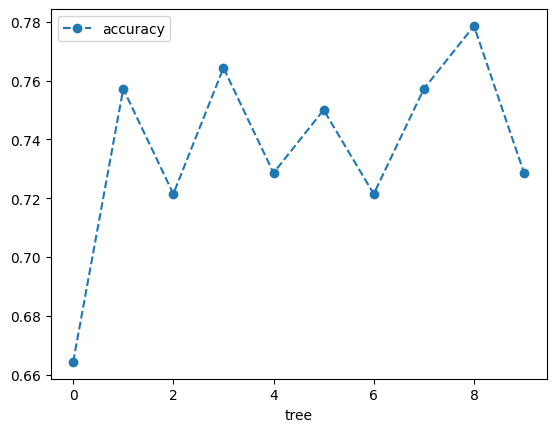

In [ ]:
from sklearn.model_selection import cross_val_score
clf_dt = DecisionTreeClassifier(random_state = 69, ccp_alpha = 0.010)
scores = cross_val_score(clf_dt, x_train, y_train, cv = 10)
df = pd.DataFrame(data = {'tree': range(10), 'accuracy': scores})
df.plot( x = 'tree', y = 'accuracy', marker = 'o', linestyle = '--')

In [ ]:
# we will try to find an alpha value
# that is generalized
# and performs well for all sets of data

In [ ]:
alpha_loop_values = []
for alpha in alphas:
  clf_dt = DecisionTreeClassifier(random_state = 71, ccp_alpha = alpha)
  scores = cross_val_score(clf_dt, x_train, y_train, cv = 10)
  alpha_loop_values.append([ alpha, np.mean(scores), np.std(scores)])

<Axes: xlabel='alpha'>

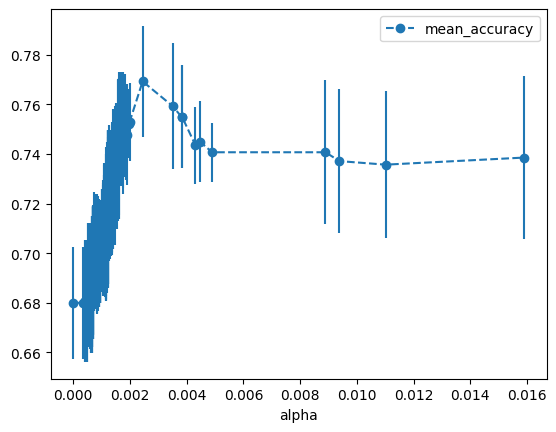

In [ ]:
alpha_results = pd.DataFrame(data = alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'std'])
alpha_results.plot(x = 'alpha', y = 'mean_accuracy', yerr = 'std', marker = 'o', linestyle = '--')

In [ ]:
ideal_alpha = alpha_results.loc[alpha_results['mean_accuracy'].idxmax()]['alpha']
ideal_alpha

0.0024489795918367354

Building Pruned Decision Tree

In [ ]:
clf_dt_pruned = DecisionTreeClassifier(random_state = 28, ccp_alpha = ideal_alpha)
clf_dt_pruned.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0024489795918367354, random_state=28)

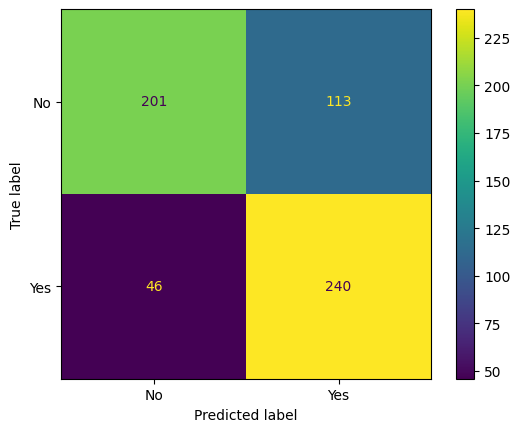

In [ ]:
#building a confusion matrix
ConfusionMatrixDisplay.from_estimator(clf_dt_pruned, x_test, y_test)

In [ ]:
# we can see the pruned model performs much better on true positives
# but performs relatively lower than unpruned tree for true negatives

[Text(0.35526315789473684, 0.9166666666666666, 'Contract_Month-to-month <= 0.5\ngini = 0.5\nsamples = 1400\nvalue = [686, 714]\nclass = Yes Churn'),
 Text(0.10526315789473684, 0.75, 'MonthlyCharges <= 93.075\ngini = 0.274\nsamples = 476\nvalue = [398, 78]\nclass = No Churn'),
 Text(0.23026315789473684, 0.8333333333333333, 'True  '),
 Text(0.05263157894736842, 0.5833333333333334, 'gini = 0.169\nsamples = 344\nvalue = [312, 32]\nclass = No Churn'),
 Text(0.15789473684210525, 0.5833333333333334, 'Contract_One year <= 0.5\ngini = 0.454\nsamples = 132\nvalue = [86, 46]\nclass = No Churn'),
 Text(0.10526315789473684, 0.4166666666666667, 'gini = 0.27\nsamples = 56\nvalue = [47, 9]\nclass = No Churn'),
 Text(0.21052631578947367, 0.4166666666666667, 'OnlineSecurity_Yes <= 0.5\ngini = 0.5\nsamples = 76\nvalue = [39, 37]\nclass = No Churn'),
 Text(0.15789473684210525, 0.25, 'gini = 0.454\nsamples = 43\nvalue = [15.0, 28.0]\nclass = Yes Churn'),
 Text(0.2631578947368421, 0.25, 'gini = 0.397\nsampl

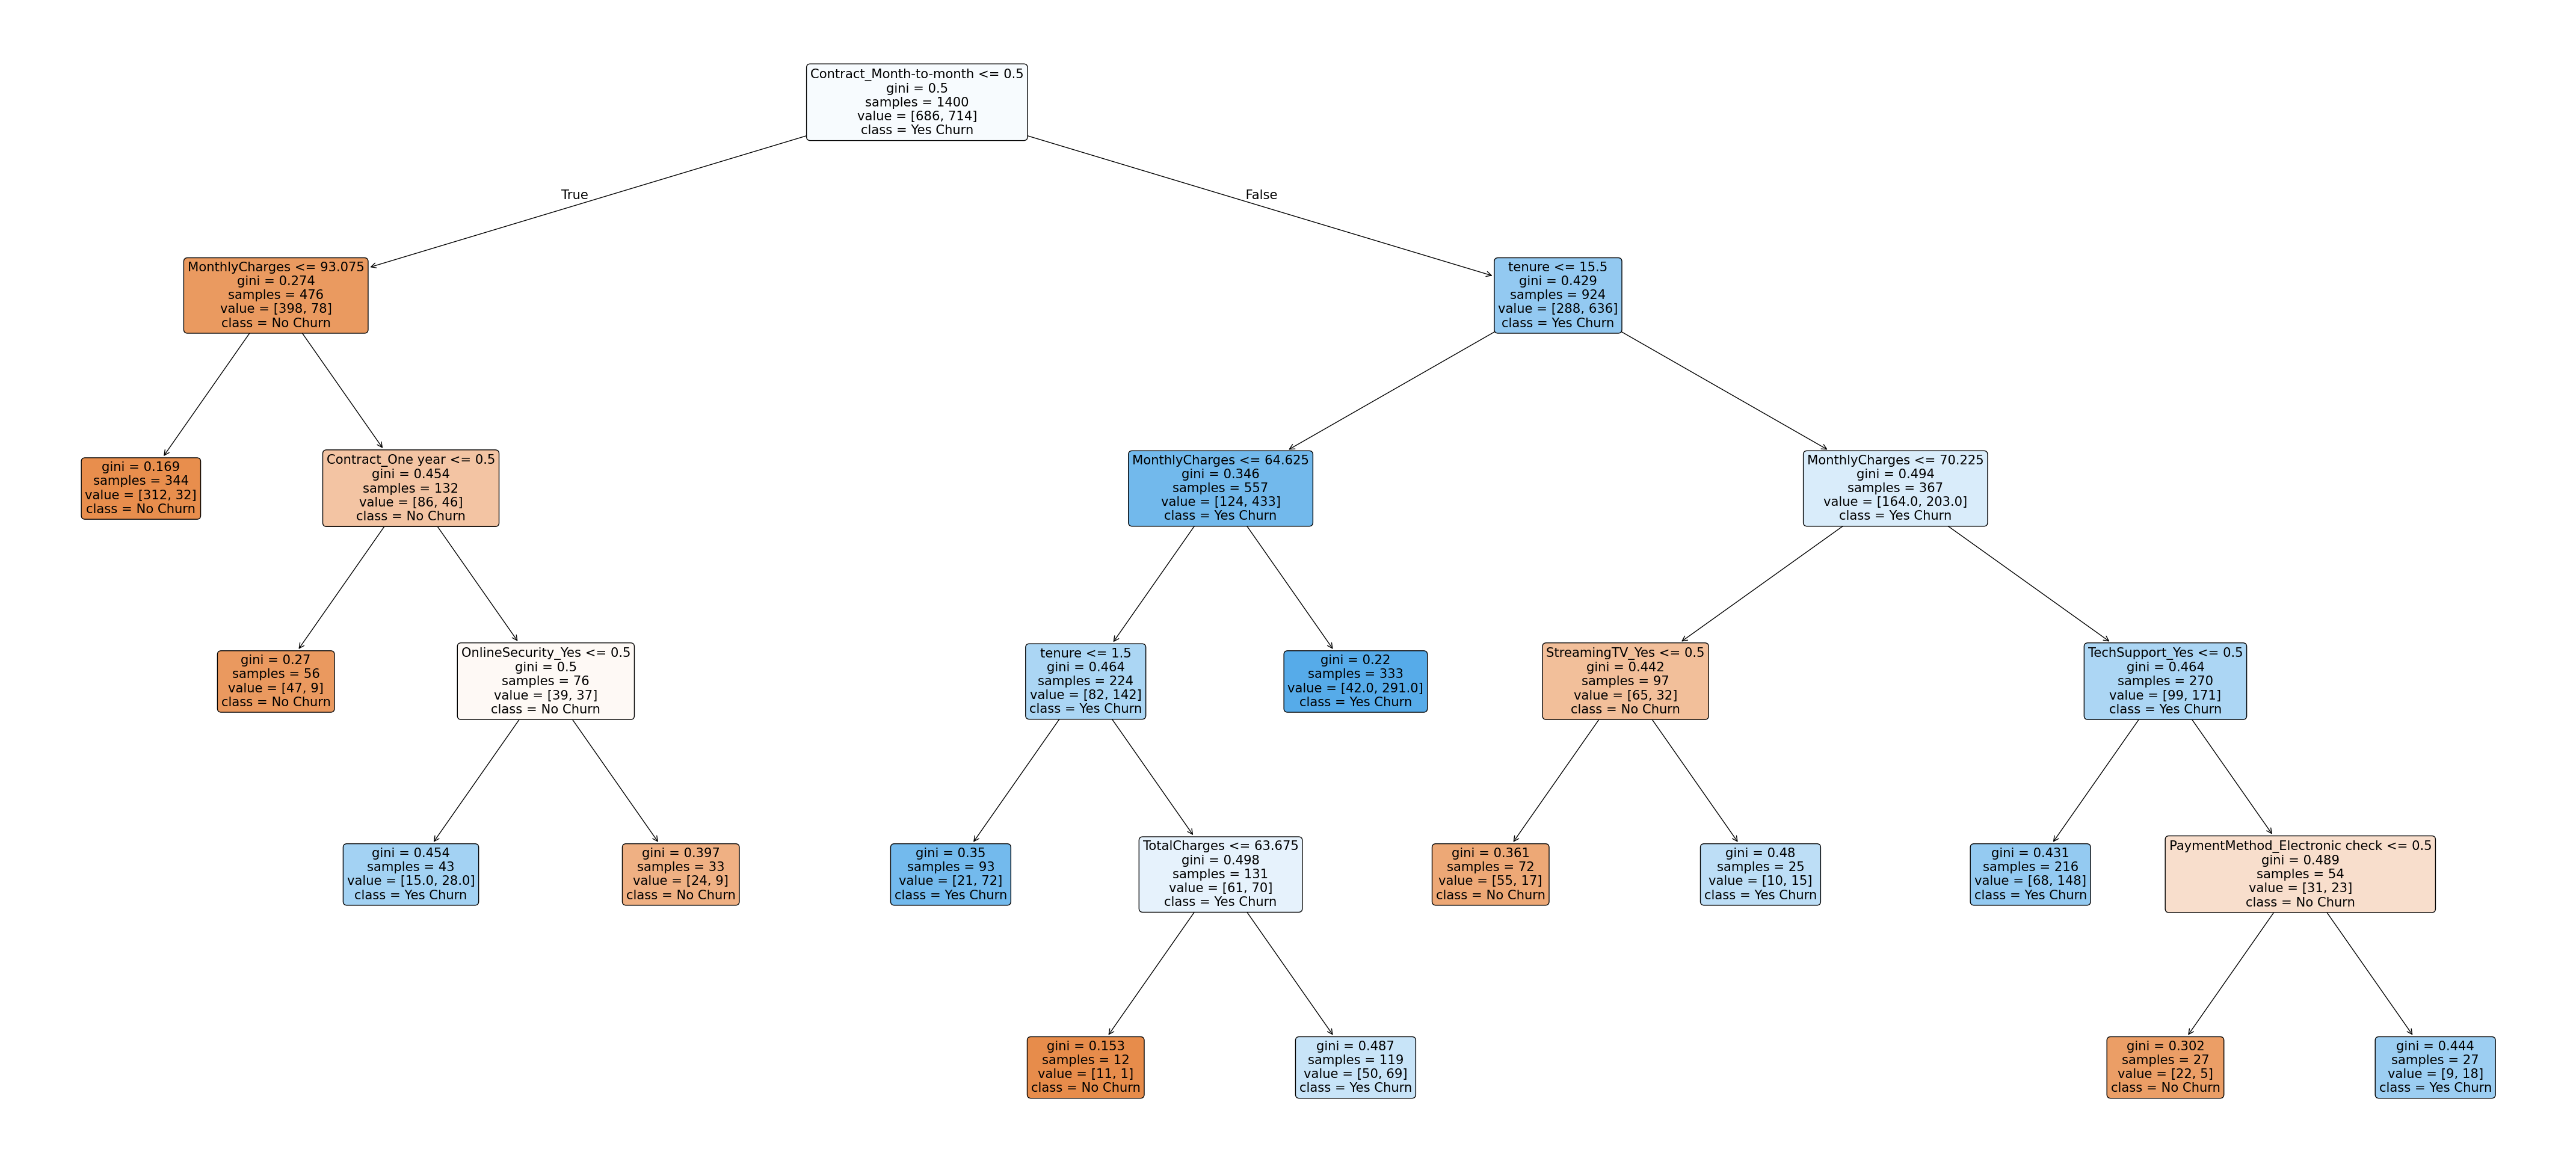

In [ ]:
# plotting the tree
plt.subplots(figsize = (55,25))
plot_tree(clf_dt_pruned, filled = True, rounded = True, class_names = ['No Churn', 'Yes Churn'] , feature_names = x.columns)

In [ ]:
# the tree is pruned well
# but specifity (tns) didnt improve much
# possible ways to further improve the classification tree
# identify and train with the important features
# probable transformation of scaling of features if possible
# use other classification models